(special_considerations_demes_models)=

# Special considerations for demes models

In [1]:
import demes
import demesdraw
import fwdpy11
import numpy as np

Consider the following demographic model:

In [2]:
yaml="""
description: split model
time_units: generations
demes:
  - name: ancestor
    epochs:
      - start_size: 100
        end_time: 100
  - name: derived1
    ancestors: [ancestor]
    epochs:
      - start_size: 100
  - name: derived2
    ancestors: [ancestor]
    epochs:
      - start_size: 100
"""

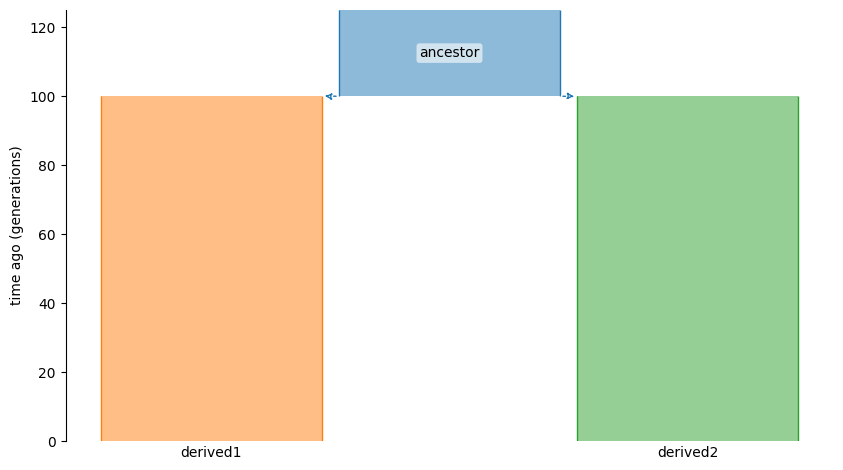

In [3]:
graph = demes.loads(yaml)
demesdraw.tubes(graph);

This model has three demes.
These demes will have integer labels 0, 1, and 2 according to the order that they are defined in the demes graph.
This type of model is called a "split" -- the ancestral deme splits into two derived.

This setup is convenient because nodes in the output will be labelled by the deme (0, 1, 2 in this case).
However, you may need to think a bit harder when modeling effect sizes varying across demes.
For example, if you want the effect sizes in `derived1` to be identical to those in `ancestor`, but different from those in `derived2`, what do you do?
The answer is to define a correlation matrix for three demes where demes 0 and 1 have perfectly-correlated effect sizes.
See {ref}`here <correlation_and_covariance_matrices>` for details.

An alternative is to define the model as a *branch* model involving only two demes:

In [4]:
yaml="""
description: branch model
time_units: generations
demes:
  - name: ancestor
    epochs:
      - start_size: 100
  - name: derived1
    ancestors: [ancestor]
    start_time: 100
    epochs:
      - start_size: 100
"""

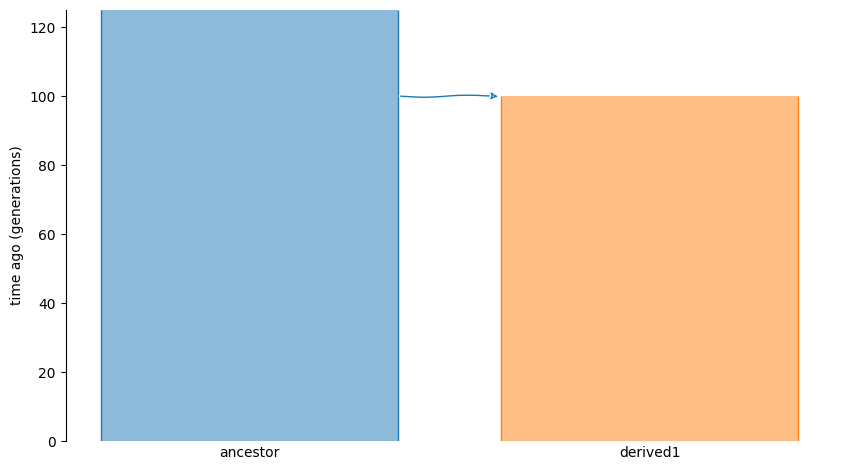

In [5]:
graph = demes.loads(yaml)
demesdraw.tubes(graph);

The branch model can be simpler to set up as you only need to consider how effect sizes vary between the ancestral and derived environments.
The cost is that you lose information at the node level about which deme a mutation maps to, etc..

See [here](https://popsim-consortium.github.io/demes-spec-docs/main/tutorial.html) for more on split vs branch models using `demes`.